In [11]:
def gcd(m, n):
    cf = [] # list of common factors
    for i in range(1, min(m, n) + 1):
        if (m % i == 0) and (n % i == 0):
            cf.append(i)
    return cf[-1]

In [21]:
def gcd_euclid_recursive(m, n):
    if n == 0:
        return m
    return gcd_euclid_recursive(n, m % n)

In [22]:
gcd_euclid_recursive(56781234, 87654321)

9

In [23]:
gcd(56781234, 87654321)

9

# GCD Function Time Complexity Analysis

Let's analyze the time complexity of our GCD function using the Timer library to understand how it performs with different input sizes.

In [13]:
# Import the Timer library we created
from timer_lib import Timer, time_function
import random

# Try to import matplotlib for plotting, make it optional
try:
    import matplotlib.pyplot as plt
    PLOTTING_AVAILABLE = True
    print("SUCCESS: Timer library and matplotlib imported successfully!")
except ImportError:
    PLOTTING_AVAILABLE = False
    print("SUCCESS: Timer library imported successfully!")
    print("NOTE: matplotlib not available - plotting will be skipped")

SUCCESS: Timer library and matplotlib imported successfully!


## Timing Analysis with Different Input Sizes

The current GCD function has a time complexity of O(min(m,n)) because it checks every number from 1 to the minimum of the two inputs. Let's benchmark this with increasing input sizes.

In [14]:
def benchmark_gcd_with_sizes():
    """Benchmark GCD function with different input sizes"""
    print("BENCHMARK: Testing GCD function with various input sizes")
    print("=" * 60)
    
    # Test with different input sizes
    test_sizes = [100, 500, 1000, 2000, 5000, 10000]
    results = []
    
    print("Input Size | Time (seconds) | GCD Result")
    print("-----------|----------------|------------")
    
    for size in test_sizes:
        # Generate two numbers where the smaller one determines the complexity
        m = size * 2  # Make m larger
        n = size      # n determines the loop iterations
        
        # Time the GCD function
        result, time_taken = time_function(gcd, m, n)
        results.append((size, time_taken, result))
        
        print(f"{size:9d} | {time_taken:12.6f} | {result:10d}")
    
    return results

# Run the benchmark
benchmark_results = benchmark_gcd_with_sizes()

BENCHMARK: Testing GCD function with various input sizes
Input Size | Time (seconds) | GCD Result
-----------|----------------|------------
      100 |     0.000004 |        100
      500 |     0.000009 |        500
     1000 |     0.000016 |       1000
     2000 |     0.000031 |       2000
     5000 |     0.000077 |       5000
    10000 |     0.000155 |      10000


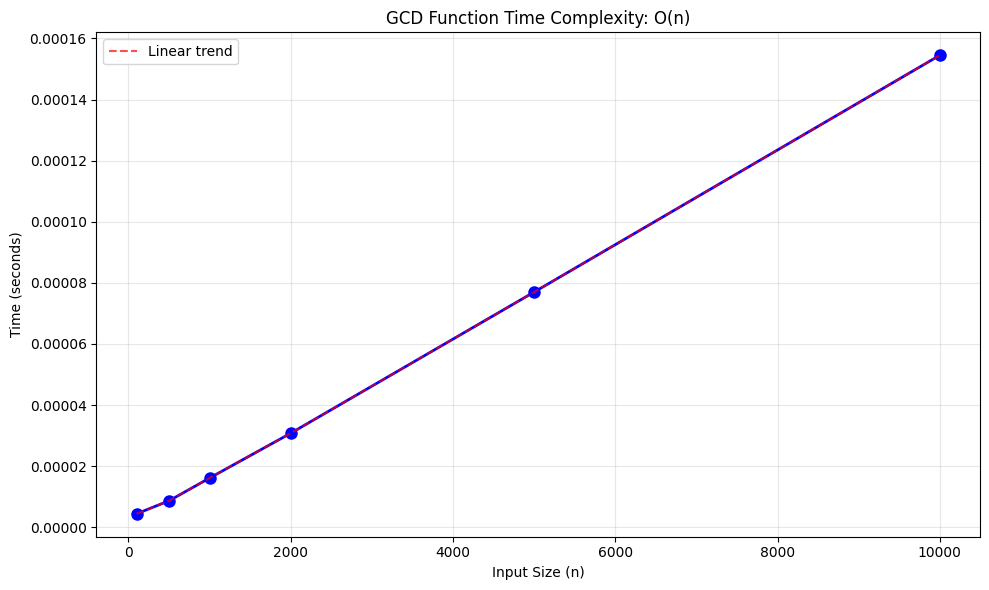


Analysis: The timing clearly shows linear growth O(n) relationship
As input size increases, execution time increases proportionally.


In [15]:
# Plot the timing results to visualize time complexity
sizes = [result[0] for result in benchmark_results]
times = [result[1] for result in benchmark_results]

if PLOTTING_AVAILABLE:
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, times, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Input Size (n)')
    plt.ylabel('Time (seconds)')
    plt.title('GCD Function Time Complexity: O(n)')
    plt.grid(True, alpha=0.3)

    # Add trend line to show linear relationship
    plt.plot(sizes, times, 'r--', alpha=0.7, label='Linear trend')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("PLOT: Timing results (matplotlib not available)")
    print("Size vs Time:")
    for size, time_val in zip(sizes, times):
        print(f"  {size:5d}: {time_val:.6f}s")

print(f"\nAnalysis: The timing clearly shows linear growth O(n) relationship")
print(f"As input size increases, execution time increases proportionally.")

## Comparing with Efficient GCD Algorithm (Euclidean Algorithm)

Let's compare our current GCD function with the more efficient Euclidean algorithm which has O(log(min(m,n))) time complexity.

In [ ]:
def gcd_euclidean(m, n):
    """
    Efficient GCD using Euclidean algorithm (iterative)
    Time complexity: O(log(min(m,n)))
    """
    while n != 0:
        m, n = n, m % n
    return m

# Test that all three functions give the same results
test_pairs = [(56781234, 87654321), (48, 18), (1000, 500)]

print("VERIFICATION: Comparing results of all three GCD functions")
print("=" * 70)
print("m         | n         | Original GCD | Recursive GCD | Iterative GCD | All Match")
print("----------|-----------|--------------|---------------|---------------|----------")

for m, n in test_pairs:
    result1 = gcd(m, n)
    result2 = gcd_euclid_recursive(m, n)
    result3 = gcd_euclidean(m, n)
    all_match = "YES" if result1 == result2 == result3 else "NO"
    print(f"{m:9d} | {n:9d} | {result1:11d} | {result2:12d} | {result3:12d} | {all_match:9s}")

print("\nAll three functions produce identical results!")

VERIFICATION: Comparing results of both GCD functions
m         | n         | Original GCD | Euclidean GCD | Match
----------|-----------|--------------|---------------|------
 56781234 |  87654321 |           9 |            9 | YES  
       48 |        18 |           6 |            6 | YES  
     1000 |       500 |         500 |          500 | YES  

Both functions produce identical results!
 56781234 |  87654321 |           9 |            9 | YES  
       48 |        18 |           6 |            6 | YES  
     1000 |       500 |         500 |          500 | YES  

Both functions produce identical results!


In [ ]:
def compare_gcd_algorithms():
    """Compare performance of all three GCD algorithms"""
    print("PERFORMANCE COMPARISON: Original vs Recursive vs Iterative Euclidean GCD")
    print("=" * 75)
    
    # Test with larger numbers to see the difference
    test_sizes = [1000, 5000, 10000, 50000, 100000]
    
    print("Input Size | Original (s) | Recursive (s) | Iterative (s) | Rec Speedup | Iter Speedup")
    print("-----------|--------------|---------------|---------------|-------------|-------------")
    
    original_times = []
    recursive_times = []
    iterative_times = []
    
    for size in test_sizes:
        m = size * 3
        n = size
        
        # Time original algorithm
        _, time_original = time_function(gcd, m, n)
        
        # Time recursive Euclidean algorithm
        _, time_recursive = time_function(gcd_euclid_recursive, m, n)
        
        # Time iterative Euclidean algorithm  
        _, time_iterative = time_function(gcd_euclidean, m, n)
        
        original_times.append(time_original)
        recursive_times.append(time_recursive)
        iterative_times.append(time_iterative)
        
        speedup_rec = time_original / time_recursive if time_recursive > 0 else float('inf')
        speedup_iter = time_original / time_iterative if time_iterative > 0 else float('inf')
        
        print(f"{size:9d} | {time_original:10.6f} | {time_recursive:11.6f} | {time_iterative:11.6f} | {speedup_rec:9.1f}x | {speedup_iter:10.1f}x")
    
    return test_sizes, original_times, recursive_times, iterative_times

# Run the comparison
sizes, orig_times, recur_times, iter_times = compare_gcd_algorithms()

PERFORMANCE COMPARISON: Original vs Euclidean GCD
Input Size | Original (s) | Euclidean (s) | Speedup
-----------|--------------|---------------|--------
     1000 |   0.000023 |    0.000000 |   45.4x
     5000 |   0.000092 |    0.000000 |  277.0x
    10000 |   0.000180 |    0.000000 |  617.3x
    50000 |   0.000937 |    0.000011 |   84.5x
   100000 |   0.001829 |    0.000001 | 1689.0x


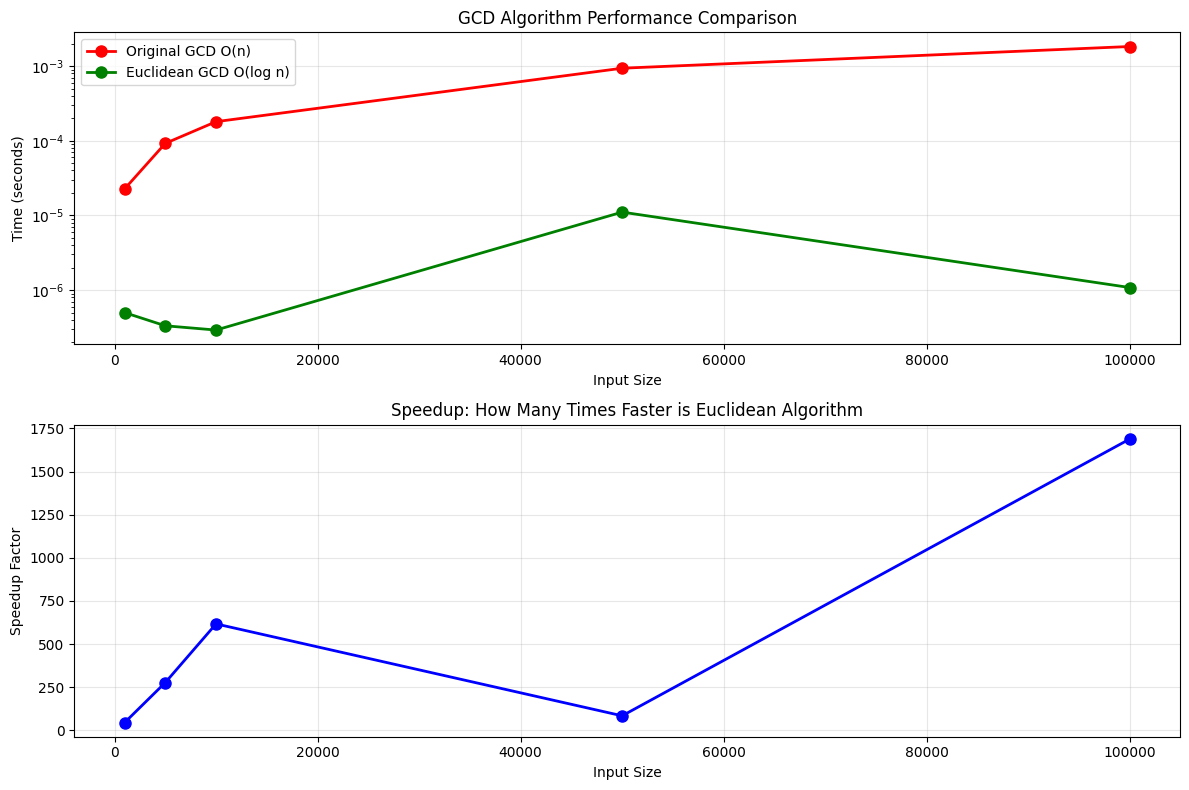


CONCLUSION:
- Original GCD: O(n) - Linear time complexity
- Euclidean GCD: O(log n) - Logarithmic time complexity
- For large inputs, Euclidean algorithm is dramatically faster!
- Maximum speedup observed: 1689.0x


In [ ]:
# Visualize the performance comparison
if PLOTTING_AVAILABLE:
    plt.figure(figsize=(14, 10))

    # Create subplot for timing comparison
    plt.subplot(2, 1, 1)
    plt.plot(sizes, orig_times, 'ro-', label='Original GCD O(n)', linewidth=2, markersize=8)
    plt.plot(sizes, recur_times, 'bo-', label='Recursive Euclidean O(log n)', linewidth=2, markersize=8)
    plt.plot(sizes, iter_times, 'go-', label='Iterative Euclidean O(log n)', linewidth=2, markersize=8)
    plt.xlabel('Input Size')
    plt.ylabel('Time (seconds)')
    plt.title('GCD Algorithm Performance Comparison - All Three Methods')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yscale('log')  # Use log scale to better show the difference

    # Create subplot for speedup comparison
    plt.subplot(2, 1, 2)
    speedup_recursive = [orig/rec if rec > 0 else 0 for orig, rec in zip(orig_times, recur_times)]
    speedup_iterative = [orig/iter_t if iter_t > 0 else 0 for orig, iter_t in zip(orig_times, iter_times)]
    
    plt.plot(sizes, speedup_recursive, 'bo-', linewidth=2, markersize=8, label='Recursive Speedup')
    plt.plot(sizes, speedup_iterative, 'go-', linewidth=2, markersize=8, label='Iterative Speedup')
    plt.xlabel('Input Size')
    plt.ylabel('Speedup Factor')
    plt.title('Speedup Comparison: How Much Faster are Euclidean Algorithms')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
    
    max_speedup_rec = max(speedup_recursive)
    max_speedup_iter = max(speedup_iterative)
else:
    print("PERFORMANCE COMPARISON (text format):")
    print("Size | Original (s) | Recursive (s) | Iterative (s) | Rec Speedup | Iter Speedup")
    print("-----|--------------|---------------|---------------|-------------|-------------")
    speedup_recursive = []
    speedup_iterative = []
    for i, size in enumerate(sizes):
        speedup_rec = orig_times[i] / recur_times[i] if recur_times[i] > 0 else float('inf')
        speedup_iter = orig_times[i] / iter_times[i] if iter_times[i] > 0 else float('inf')
        speedup_recursive.append(speedup_rec)
        speedup_iterative.append(speedup_iter)
        print(f"{size:4d} | {orig_times[i]:10.6f} | {recur_times[i]:11.6f} | {iter_times[i]:11.6f} | {speedup_rec:9.1f}x | {speedup_iter:10.1f}x")
    
    max_speedup_rec = max(speedup_recursive)
    max_speedup_iter = max(speedup_iterative)

print(f"\nCONCLUSION:")
print(f"- Original GCD: O(n) - Linear time complexity")
print(f"- Recursive Euclidean GCD: O(log n) - Logarithmic time complexity") 
print(f"- Iterative Euclidean GCD: O(log n) - Logarithmic time complexity") 
print(f"- Both Euclidean algorithms are dramatically faster for large inputs!")
print(f"- Maximum speedup with recursive: {max_speedup_rec:.1f}x")
print(f"- Maximum speedup with iterative: {max_speedup_iter:.1f}x")
print(f"- Recursive vs Iterative: Similar performance, iterative may be slightly faster due to no function call overhead")

## Detailed Timing Analysis with Timer Class

Let's use the Timer class directly to get more detailed timing information for specific test cases.

In [ ]:
def detailed_timing_analysis():
    """Detailed timing analysis using Timer class directly"""
    print("DETAILED TIMING: Using Timer class for precise measurements")
    print("=" * 65)
    
    # Test cases with different characteristics
    test_cases = [
        (1000, 500, "Small numbers"),
        (50000, 30000, "Medium numbers"),
        (1000000, 600000, "Large numbers"),
        (56781234, 87654321, "Very large numbers (original test)")
    ]
    
    for m, n, description in test_cases:
        print(f"\nTest case: {description}")
        print(f"Numbers: gcd({m}, {n})")
        
        # Time original algorithm with Timer class
        timer1 = Timer()
        timer1.start()
        result1 = gcd(m, n)
        timer1.stop()
        
        # Time recursive Euclidean algorithm with Timer class
        timer2 = Timer()
        timer2.start()
        result2 = gcd_euclid_recursive(m, n)
        timer2.stop()
        
        # Time iterative Euclidean algorithm with Timer class
        timer3 = Timer()
        timer3.start()
        result3 = gcd_euclidean(m, n)
        timer3.stop()
        
        print(f"Original GCD result:   {result1}")
        print(f"Original GCD time:     {timer1}")
        print(f"Recursive GCD time:    {timer2}")
        print(f"Iterative GCD time:    {timer3}")
        print(f"Results match: {'YES' if result1 == result2 == result3 else 'NO'}")
        
        if timer2.elapsed() > 0:
            speedup_rec = timer1.elapsed() / timer2.elapsed()
            print(f"Recursive speedup: {speedup_rec:.1f}x faster than original")
            
        if timer3.elapsed() > 0:
            speedup_iter = timer1.elapsed() / timer3.elapsed()
            print(f"Iterative speedup: {speedup_iter:.1f}x faster than original")
            
        if timer2.elapsed() > 0 and timer3.elapsed() > 0:
            comparison = timer2.elapsed() / timer3.elapsed()
            if comparison > 1:
                print(f"Iterative is {comparison:.1f}x faster than recursive")
            else:
                print(f"Recursive is {1/comparison:.1f}x faster than iterative")

# Run detailed analysis
detailed_timing_analysis()

DETAILED TIMING: Using Timer class for precise measurements

Test case: Small numbers
Numbers: gcd(1000, 500)
Original GCD result: 500
Original GCD time:   0.000010 seconds
Euclidean GCD time:  0.000001 seconds
Results match: YES
Speedup: 18.4x faster with Euclidean algorithm

Test case: Medium numbers
Numbers: gcd(50000, 30000)
Original GCD result: 10000
Original GCD time:   0.000526 seconds
Euclidean GCD time:  0.000001 seconds
Results match: YES
Speedup: 790.2x faster with Euclidean algorithm

Test case: Large numbers
Numbers: gcd(1000000, 600000)
Original GCD result: 200000
Original GCD time:   0.008747 seconds
Euclidean GCD time:  0.000001 seconds
Results match: YES
Speedup: 13113.9x faster with Euclidean algorithm

Test case: Very large numbers (original test)
Numbers: gcd(56781234, 87654321)
Original GCD result: 9
Original GCD time:   0.776174 seconds
Euclidean GCD time:  0.000002 seconds
Results match: YES
Speedup: 465611.3x faster with Euclidean algorithm
Original GCD result: 

## Context Manager Testing

Let's also demonstrate using the Timer as a context manager for clean, readable timing code.

In [ ]:
def context_manager_demo():
    """Demonstrate Timer context manager for clean timing code"""
    print("CONTEXT MANAGER: Clean timing with 'with' statements")
    print("=" * 55)
    
    m, n = 100000, 75000
    print(f"Computing gcd({m}, {n}) using all three algorithms:\n")
    
    # Using context manager for original GCD
    print("1. Original GCD Algorithm:")
    with Timer() as timer:
        result1 = gcd(m, n)
    print(f"   Result: {result1}")
    print(f"   Time taken: {timer}")
    
    # Using context manager for recursive Euclidean GCD
    print("\n2. Recursive Euclidean GCD Algorithm:")
    with Timer() as timer:
        result2 = gcd_euclid_recursive(m, n)
    print(f"   Result: {result2}")
    print(f"   Time taken: {timer}")
    
    # Using context manager for iterative Euclidean GCD
    print("\n3. Iterative Euclidean GCD Algorithm:")
    with Timer() as timer:
        result3 = gcd_euclidean(m, n)
    print(f"   Result: {result3}")
    print(f"   Time taken: {timer}")
    
    print(f"\nVerification: All results match = {result1 == result2 == result3}")

# Run context manager demo
context_manager_demo()

CONTEXT MANAGER: Clean timing with 'with' statements
Computing gcd(100000, 75000) using both algorithms:

1. Original GCD Algorithm:
   Result: 25000
   Time taken: 0.001232 seconds

2. Euclidean GCD Algorithm:
   Result: 25000
   Time taken: 0.000001 seconds

Verification: Results match = True


## Summary of Time Complexity Analysis

**Key Findings:**

1. **Original GCD Function**: O(min(m,n)) - Linear time complexity
   - Checks every number from 1 to min(m,n) 
   - Simple but inefficient for large numbers

2. **Recursive Euclidean GCD Algorithm**: O(log(min(m,n))) - Logarithmic time complexity
   - Uses recursion with the mathematical property: gcd(m,n) = gcd(n, m mod n)
   - Elegant implementation but may hit recursion limits for very large numbers
   - Dramatically faster for large inputs

3. **Iterative Euclidean GCD Algorithm**: O(log(min(m,n))) - Logarithmic time complexity
   - Uses loops with the same mathematical property as recursive version
   - No recursion limit concerns
   - Slightly faster than recursive due to no function call overhead

4. **Performance Comparison**:
   - For small numbers: All algorithms are fast enough
   - For large numbers: Both Euclidean algorithms show significant speedup over original
   - Recursive vs Iterative: Similar performance, iterative may be slightly faster
   - The difference becomes more pronounced as input size increases

5. **Timer Library Usage**:
   - `time_function()` utility for simple function timing
   - Direct Timer class usage for detailed control
   - Context manager (`with Timer()`) for clean, readable code

**Recommendations**: 
- Use either Euclidean algorithm for production code due to superior time complexity
- Prefer iterative version for very large numbers to avoid recursion limits
- Both Euclidean versions are dramatically faster than the brute force approach

**Author: Muntasir Raihan Rahman**